<a href="https://colab.research.google.com/github/sophia-szady/sj-project/blob/main/Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv1D, MaxPooling1D, Dropout

In [128]:
data = np.array(pd.read_csv("data_set.csv"))
data.shape

(4962, 133)

In [140]:
unique_diseases = sorted(list(set(data[:,-1]))) #determines the number of unique diseases

#map the diseases to specific indices
diseases_indices = dict((c, i) for i, c in enumerate(unique_diseases))
indices_diseases = dict((i, c) for i, c in enumerate(unique_diseases))

print(diseases_indices)

X = np.zeros((len(data[:,:-1]), len(data[-1,:-1]), 41)) #num of cases x num of symptoms x num of diseases
Y = np.zeros((len(data[:,:-1]), 41))
print(X.shape)
print(Y.shape)

print(diseases_indices[data[20,-1]])

#one hot encoding for X and Y matrices
for i in range(len(data)):
  for j in range(len(data[0,:-1])):
    if data[i,j] == 1:
      X[i,j,diseases_indices[data[i,-1]]] = 1
  Y[i,diseases_indices[data[i,-1]]] = 1

indices = np.arange(len(X))
np.random.shuffle(indices)
X = X[indices]
Y = Y[indices]

#splits X and Y into test, train, and valid
train_ratio  = 0.8
train_length = X.shape[0]
train_split  = int(train_ratio*train_length)
X_test, Y_test = X[train_split:], Y[train_split:]
X_train, Y_train = X[:train_split], Y[:train_split] 

valid_ratio  = 0.75
valid_length = X_train.shape[0]
valid_split  = int(valid_ratio*valid_length)
X_valid, Y_valid = X_train[valid_split:], Y_train[valid_split:]
X_train, Y_train = X_train[:valid_split], Y_train[:valid_split]

{'(vertigo) Paroymsal  Positional Vertigo': 0, 'AIDS': 1, 'Acne': 2, 'Alcoholic hepatitis': 3, 'Allergy': 4, 'Arthritis': 5, 'Bronchial Asthma': 6, 'Cervical spondylosis': 7, 'Chicken pox': 8, 'Chronic cholestasis': 9, 'Common Cold': 10, 'Dengue': 11, 'Diabetes ': 12, 'Dimorphic hemmorhoids(piles)': 13, 'Drug Reaction': 14, 'Fungal infection': 15, 'GERD': 16, 'Gastroenteritis': 17, 'Heart attack': 18, 'Hepatitis B': 19, 'Hepatitis C': 20, 'Hepatitis D': 21, 'Hepatitis E': 22, 'Hypertension ': 23, 'Hyperthyroidism': 24, 'Hypoglycemia': 25, 'Hypothyroidism': 26, 'Impetigo': 27, 'Jaundice': 28, 'Malaria': 29, 'Migraine': 30, 'Osteoarthristis': 31, 'Paralysis (brain hemorrhage)': 32, 'Peptic ulcer diseae': 33, 'Pneumonia': 34, 'Psoriasis': 35, 'Tuberculosis': 36, 'Typhoid': 37, 'Urinary tract infection': 38, 'Varicose veins': 39, 'hepatitis A': 40}
(4962, 132, 41)
(4962, 41)
16


In [157]:
#running an LSTM model on the data
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[-2], X.shape[-1]))) # (batch, 128)
model.add(Dense(len(unique_diseases)))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 256)               305152    
                                                                 
 dense_45 (Dense)            (None, 41)                10537     
                                                                 
 activation_11 (Activation)  (None, 41)                0         
                                                                 
Total params: 315,689
Trainable params: 315,689
Non-trainable params: 0
_________________________________________________________________


In [159]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=25, batch_size=32, validation_data=(X_valid, Y_valid))

Epoch 1/25
93/93 [==============================] - 70s 569ms/step - loss: 3.6989 - accuracy: 0.0665 - val_loss: 3.6445 - val_accuracy: 0.0685
Epoch 2/25
93/93 [==============================] - 54s 578ms/step - loss: 2.9931 - accuracy: 0.1284 - val_loss: 2.8032 - val_accuracy: 0.0987
Epoch 3/25
93/93 [==============================] - 51s 552ms/step - loss: 2.3227 - accuracy: 0.2016 - val_loss: 2.4044 - val_accuracy: 0.1349
Epoch 4/25
93/93 [==============================] - 48s 517ms/step - loss: 2.1891 - accuracy: 0.2127 - val_loss: 1.9126 - val_accuracy: 0.3494
Epoch 5/25
93/93 [==============================] - 47s 507ms/step - loss: 1.8489 - accuracy: 0.3320 - val_loss: 2.0768 - val_accuracy: 0.1863
Epoch 6/25
93/93 [==============================] - 52s 557ms/step - loss: 1.9556 - accuracy: 0.2661 - val_loss: 1.7440 - val_accuracy: 0.3414
Epoch 7/25
93/93 [==============================] - 52s 557ms/step - loss: 1.5992 - accuracy: 0.4069 - val_loss: 1.6186 - val_accuracy: 0.3625

In [160]:
eval = model.evaluate(X_test,Y_test)
print("Test loss:",eval)

32/32 [==============================] - 6s 177ms/step - loss: 0.7399 - accuracy: 0.8167
Test loss: [0.7398611903190613, 0.8167170286178589]


32/32 [==============================] - 6s 177ms/step


<Axes: >

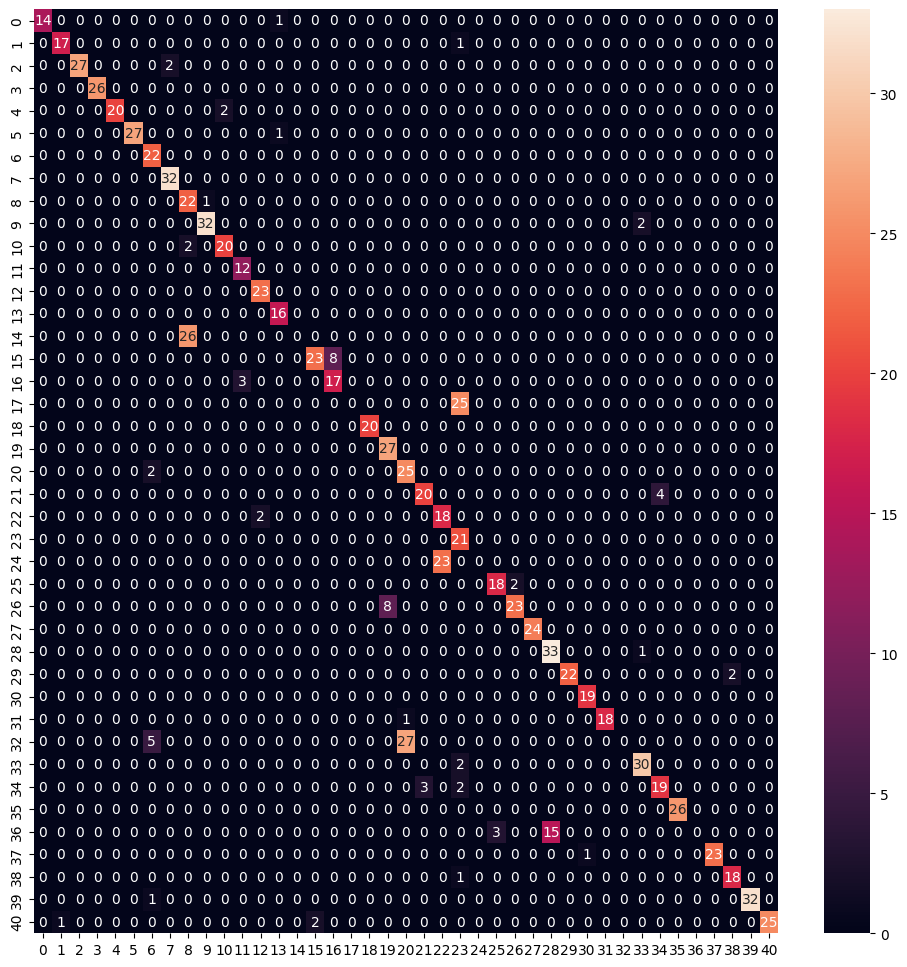

In [162]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#creating a heatmap for the model
y_pred=model.predict(X_test) 
cm = confusion_matrix(np.argmax(Y_test,1), np.argmax(y_pred,1))
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt="d")